In [ ]:
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 5.8 kB/s 
     |████████████████████████████████| 439 kB 89.8 MB/s 
     |████████████████████████████████| 6.0 MB 42.4 MB/s 
     |████████████████████████████████| 1.7 MB 63.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

In [ ]:
import os
from google.colab import drive

import pandas as pd
import numpy as np
from scipy.stats import mode

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

import tensorflow as tf
import tensorflow_hub as hub

Read data from google drive

In [ ]:
drive.mount('/content/gdrive')
train = '/content/gdrive/MyDrive/data/train_emails.csv'
adv = '/content/gdrive/MyDrive/adv_t.csv'

df_train = pd.read_csv(train)
df_adv = pd.read_csv(adv)


Mounted at /content/gdrive


Define Cosine Similarity function

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

Define KNN classifier function

In [ ]:
# def find_knn_label(x_adv, X_train, Y_train, k):
#   query_vec = model([x_adv])[0]
#   sim = []
#   for sent in X_train:
#     sim.append(cosine(query_vec, model([sent])[0]))

#   sim_arr = np.array(sim)
#   indexes_k = np.argsort(sim_arr)[::-1][:k]
#   #print(indexes)
#   candidates_k = []
 
#   for index in indexes_k:
#     candidates_k1.append(Y_train[index])

#   return mode(candidates_k)[0][0]

In [ ]:
def find_knn_label(x_adv, X_train, Y_train, k1,k3,k5,k7,k9):
  query_vec = model([x_adv])[0]
  sim = []
  for sent in X_train:
    sim.append(cosine(query_vec, model([sent])[0]))

  sim_arr = np.array(sim)

  indexes_k1 = np.argsort(sim_arr)[::-1][:k1]
  indexes_k3 = np.argsort(sim_arr)[::-1][:k3]
  indexes_k5 = np.argsort(sim_arr)[::-1][:k5]
  indexes_k7 = np.argsort(sim_arr)[::-1][:k7]
  indexes_k9 = np.argsort(sim_arr)[::-1][:k9]
  #print(indexes)
  candidates_k1 = []
  candidates_k3 = []
  candidates_k5 = []
  candidates_k7 = []
  candidates_k9 = []
  for index in indexes_k1:
    candidates_k1.append(Y_train[index])
  for index in indexes_k3:
    candidates_k3.append(Y_train[index])
  for index in indexes_k5:
    candidates_k5.append(Y_train[index])
  for index in indexes_k7:
    candidates_k7.append(Y_train[index])
  for index in indexes_k9:
    candidates_k9.append(Y_train[index])
  
  return mode(candidates_k1)[0][0], mode(candidates_k3)[0][0], mode(candidates_k5)[0][0], mode(candidates_k7)[0][0], mode(candidates_k9)[0][0]

In [ ]:
# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

def confusion_show(cf_matrix, k):
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

    ax.set_title(k + ' Nearest Neighbors');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Legit','Phish'])
    ax.yaxis.set_ticklabels(['Legit','Phish'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


Store dataframes in lists

In [ ]:
X_adv = []
for i in range(df_adv.shape[0]):
  X_adv.append(df_adv['text'].iloc[i].replace('\n',''))

Y_adv = df_adv['label'].tolist()

In [ ]:
X_train = df_train['text'].tolist()
Y_train = df_train['label'].tolist()

Exacute KNN function

In [ ]:
prediction_k1 = []
prediction_k3 = []
prediction_k5 = []
prediction_k7 = []
prediction_k9 = []

for i in range(len(X_adv)):
  k1, k3, k5, k7, k9 = find_knn_label(X_adv[i], X_train, Y_train, 1,3,5,7,9)
  prediction_k1.append(k1)
  prediction_k3.append(k3)
  prediction_k5.append(k5)
  prediction_k7.append(k7)
  prediction_k9.append(k9)

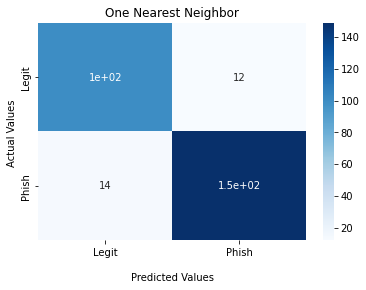

In [ ]:
print(confusion_matrix(Y_adv,prediction_k1))
confusion_show(confusion_matrix(Y_adv,prediction_k1), 'One')

In [ ]:
accuracy_score(Y_adv,prediction_k1)

0.9054545454545454

In [ ]:
f1_score(Y_adv,prediction_k1)

0.9197530864197531

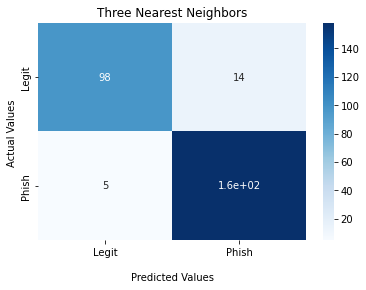

In [ ]:
print(confusion_matrix(Y_adv,prediction_k3))
confusion_show(confusion_matrix(Y_adv,prediction_k3), 'Three')

In [ ]:
accuracy_score(Y_adv,prediction_k3)

0.9309090909090909

In [ ]:
f1_score(Y_adv,prediction_k3)

0.9432835820895521

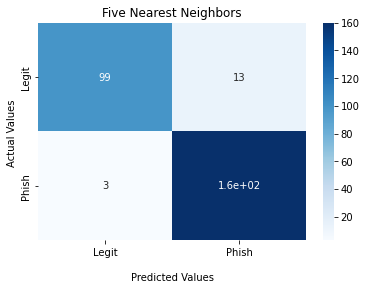

In [ ]:
print(confusion_matrix(Y_adv,prediction_k5))
confusion_show(confusion_matrix(Y_adv,prediction_k5), 'Five')

In [ ]:
accuracy_score(Y_adv,prediction_k5)

0.9418181818181818

In [ ]:
f1_score(Y_adv,prediction_k5)

0.9523809523809523

0.9418181818181818
0.9518072289156626


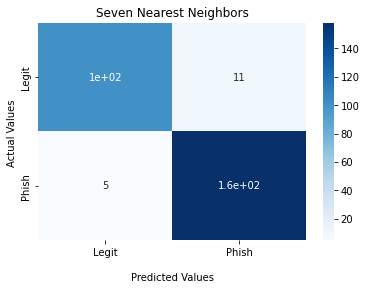

In [ ]:
print(confusion_matrix(Y_adv,prediction_k7))
confusion_show(confusion_matrix(Y_adv,prediction_k7), 'Seven')
print(accuracy_score(Y_adv,prediction_k7))
print(f1_score(Y_adv,prediction_k7))

0.9345454545454546
0.9457831325301205


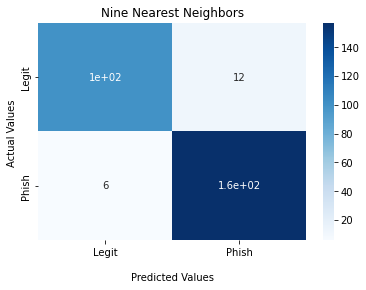

In [ ]:
print(confusion_matrix(Y_adv,prediction_k9))
confusion_show(confusion_matrix(Y_adv,prediction_k9), 'Nine')
print(accuracy_score(Y_adv,prediction_k9))
print(f1_score(Y_adv,prediction_k9))

In [ ]:
prediction_k1_f = []
prediction_k3_f = []
prediction_k5_f = []

for i in range(len(X_adv)):
  k1, k3, k5 = find_knn_label(X_adv[i], X_train, Y_train, 1,3,5)
  prediction_k1_f.append(k1)
  prediction_k3_f.append(k3)
  prediction_k5_f.append(k5)

In [ ]:
print(confusion_matrix(Y_adv,prediction_k1_f))
print(accuracy_score(Y_adv,prediction_k1_f))
print(f1_score(Y_adv,prediction_k1_f))

[[100  12]
 [ 14 149]]
0.9054545454545454
0.9197530864197531


In [ ]:
print(confusion_matrix(Y_adv,prediction_k3_f))
print(accuracy_score(Y_adv,prediction_k3_f))
print(f1_score(Y_adv,prediction_k3_f))

[[ 98  14]
 [  5 158]]
0.9309090909090909
0.9432835820895521


In [ ]:
print(confusion_matrix(Y_adv,prediction_k5_f))
print(accuracy_score(Y_adv,prediction_k5_f))
print(f1_score(Y_adv,prediction_k5_f))

[[ 99  13]
 [  3 160]]
0.9418181818181818
0.9523809523809523
